In [1]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPool2D, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np
import os

In [2]:
directory = 'models'
if not os.path.exists(directory):
    os.mkdir(directory)

In [3]:
X_train = np.load('Data/x_train.npy')
X_test = np.load('Data/x_test.npy')
y_train = np.load('Data/y_train.npy')
y_test = np.load('Data/y_test.npy')

print('Data Shape: ', np.shape(X_train)[1:])

Data Shape:  (28, 28)


In [4]:
# scaling data
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# convert each number into a single-item array (for gray-scale images, for rgb images a 3-item array)
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [6]:
# One Hot Encode
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [7]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=X_train[0].shape),  # instead of <padding='same'>
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 30, 30, 1)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                        

In [9]:
history = model.fit(X_train, y_train_ohe, epochs=10, validation_data=(X_test, y_test_ohe), batch_size=300).history

Epoch 1/10
200/200 [==============================] - 52s 254ms/step - loss: 0.3209 - accuracy: 0.9048 - val_loss: 0.0690 - val_accuracy: 0.9773
Epoch 2/10
200/200 [==============================] - 47s 232ms/step - loss: 0.0775 - accuracy: 0.9766 - val_loss: 0.0451 - val_accuracy: 0.9858
Epoch 3/10
200/200 [==============================] - 44s 222ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0356 - val_accuracy: 0.9870
Epoch 4/10
200/200 [==============================] - 47s 234ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 5/10
200/200 [==============================] - 49s 247ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0275 - val_accuracy: 0.9904
Epoch 6/10
200/200 [==============================] - 50s 249ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0246 - val_accuracy: 0.9914
Epoch 7/10
200/200 [==============================] - 50s 250ms/step - loss: 0.0244 - accuracy: 0.9929 - val_loss: 0.0267 - val_ac

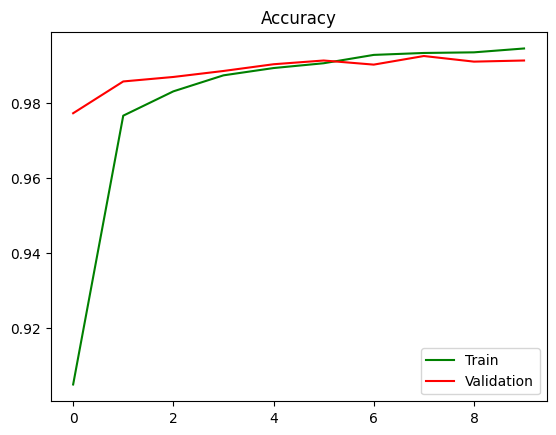

In [10]:
plt.plot(history['accuracy'], color='green', label='Train')
plt.plot(history['val_accuracy'], color='red', label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()

In [11]:
model.save(os.path.join(directory, "CNN.keras"))

In [12]:
y_pred_ohe = model.predict(X_test)
y_pred = list(map(np.argmax, y_pred_ohe))
print(metrics.classification_report(y_test, y_pred))

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

